# Chocolate Rating Analysis

## 1. Loading, Cleaning, Displaying Data 

Explain your data set here; what is it about? What are the variables? What do you want to do with it? How are you going to clean it? etc. 


In [1]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(tidyr)
library(corrplot)
library(tidyverse)
library(readr)
library(stringr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.84 loaded

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
options(repr.plot.width=12, repr.plot.height=10)

In [3]:
# load your data, display with head(), str(), etc.; show the carpentry, etc. 
data <-read.csv("./chocolate.csv")
head(data)

,Company...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
3,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


In [4]:
dim(data)

[1] 1795    9

In [5]:
names(data)

[1] "Company...Maker.if.known."        "Specific.Bean.Origin.or.Bar.Name"
[3] "REF"                              "Review.Date"                     
[5] "Cocoa.Percent"                    "Company.Location"                
[7] "Rating"                           "Bean.Type"                       
[9] "Broad.Bean.Origin"

In [6]:
colnames(data) <- c("company", "bean.bar.orgin", "ref","date" , "percent", "location","rating", "beantype" ,"origin")

In [7]:
str(data)

'data.frame':	1795 obs. of  9 variables:
 $ company       : chr  "A. Morin" "A. Morin" "A. Morin" "A. Morin" ...
 $ bean.bar.orgin: chr  "Agua Grande" "Kpime" "Atsane" "Akata" ...
 $ ref           : int  1876 1676 1676 1680 1704 1315 1315 1315 1319 1319 ...
 $ date          : int  2016 2015 2015 2015 2015 2014 2014 2014 2014 2014 ...
 $ percent       : chr  "63%" "70%" "70%" "70%" ...
 $ location      : chr  "France" "France" "France" "France" ...
 $ rating        : num  3.75 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 ...
 $ beantype      : chr  " " " " " " " " ...
 $ origin        : chr  "Sao Tome" "Togo" "Togo" "Togo" ...


In [8]:
summary(data)

   company          bean.bar.orgin          ref            date     
 Length:1795        Length:1795        Min.   :   5   Min.   :2006  
 Class :character   Class :character   1st Qu.: 576   1st Qu.:2010  
 Mode  :character   Mode  :character   Median :1069   Median :2013  
                                       Mean   :1036   Mean   :2012  
                                       3rd Qu.:1502   3rd Qu.:2015  
                                       Max.   :1952   Max.   :2017  
   percent            location             rating        beantype        
 Length:1795        Length:1795        Min.   :1.000   Length:1795       
 Class :character   Class :character   1st Qu.:2.875   Class :character  
 Mode  :character   Mode  :character   Median :3.250   Mode  :character  
                                       Mean   :3.186                     
                                       3rd Qu.:3.500                     
                                       Max.   :5.000                     

In [9]:
#checking for na values

na_count <-sapply(data, function(y) sum(length(which(is.na(y)))))

na_count <- data.frame(na_count)
                  
na_count

,na_count
,<int>
company,0
bean.bar.orgin,0
ref,0
date,0
percent,0
location,0
rating,0
beantype,0
origin,0


In [10]:
data$percent <- sapply(data$percent, function(x) gsub("%", "", x))

In [11]:
head(data)
str(data)

,company,bean.bar.orgin,ref,date,percent,location,rating,beantype,origin
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
2,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
3,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
4,A. Morin,Akata,1680,2015,70,France,3.50,,Togo
5,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru
6,A. Morin,Carenero,1315,2014,70,France,2.75,Criollo,Venezuela


'data.frame':	1795 obs. of  9 variables:
 $ company       : chr  "A. Morin" "A. Morin" "A. Morin" "A. Morin" ...
 $ bean.bar.orgin: chr  "Agua Grande" "Kpime" "Atsane" "Akata" ...
 $ ref           : int  1876 1676 1676 1680 1704 1315 1315 1315 1319 1319 ...
 $ date          : int  2016 2015 2015 2015 2015 2014 2014 2014 2014 2014 ...
 $ percent       : chr  "63" "70" "70" "70" ...
 $ location      : chr  "France" "France" "France" "France" ...
 $ rating        : num  3.75 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 ...
 $ beantype      : chr  " " " " " " " " ...
 $ origin        : chr  "Sao Tome" "Togo" "Togo" "Togo" ...


converting percenage to numeric

In [12]:
# Retype the columns
data <- type_convert(data)

# Have a look at the new data types
map_df(data, class)


── Column specification ────────────────────────────────────────────────────────
cols(
  company = col_character(),
  bean.bar.orgin = col_character(),
  percent = col_double(),
  location = col_character(),
  beantype = col_character(),
  origin = col_character()
)




company,bean.bar.orgin,ref,date,percent,location,rating,beantype,origin
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,integer,integer,numeric,character,numeric,character,character


In [16]:
avg_ratings <- data %>% 
  group_by(date) %>% # Group by new date column
  summarise(avg_rating = mean(rating), n_ratings = n()) # Summary stats

# Print our new table
avg_ratings

date,avg_rating,n_ratings
<int>,<dbl>,<int>
2006,3.125000,72
2007,3.162338,77
2008,2.994624,93
2009,3.073171,123
2010,3.148649,111
2011,3.256061,165
2012,3.178205,195
2013,3.197011,184
2014,3.189271,247


## 2. Exploratory Data Analysis 

Have your multiple code and markdown cells here to explore the data. Univariate, multivariate, histograms, correlations, scatter plots, missing values, etc. 


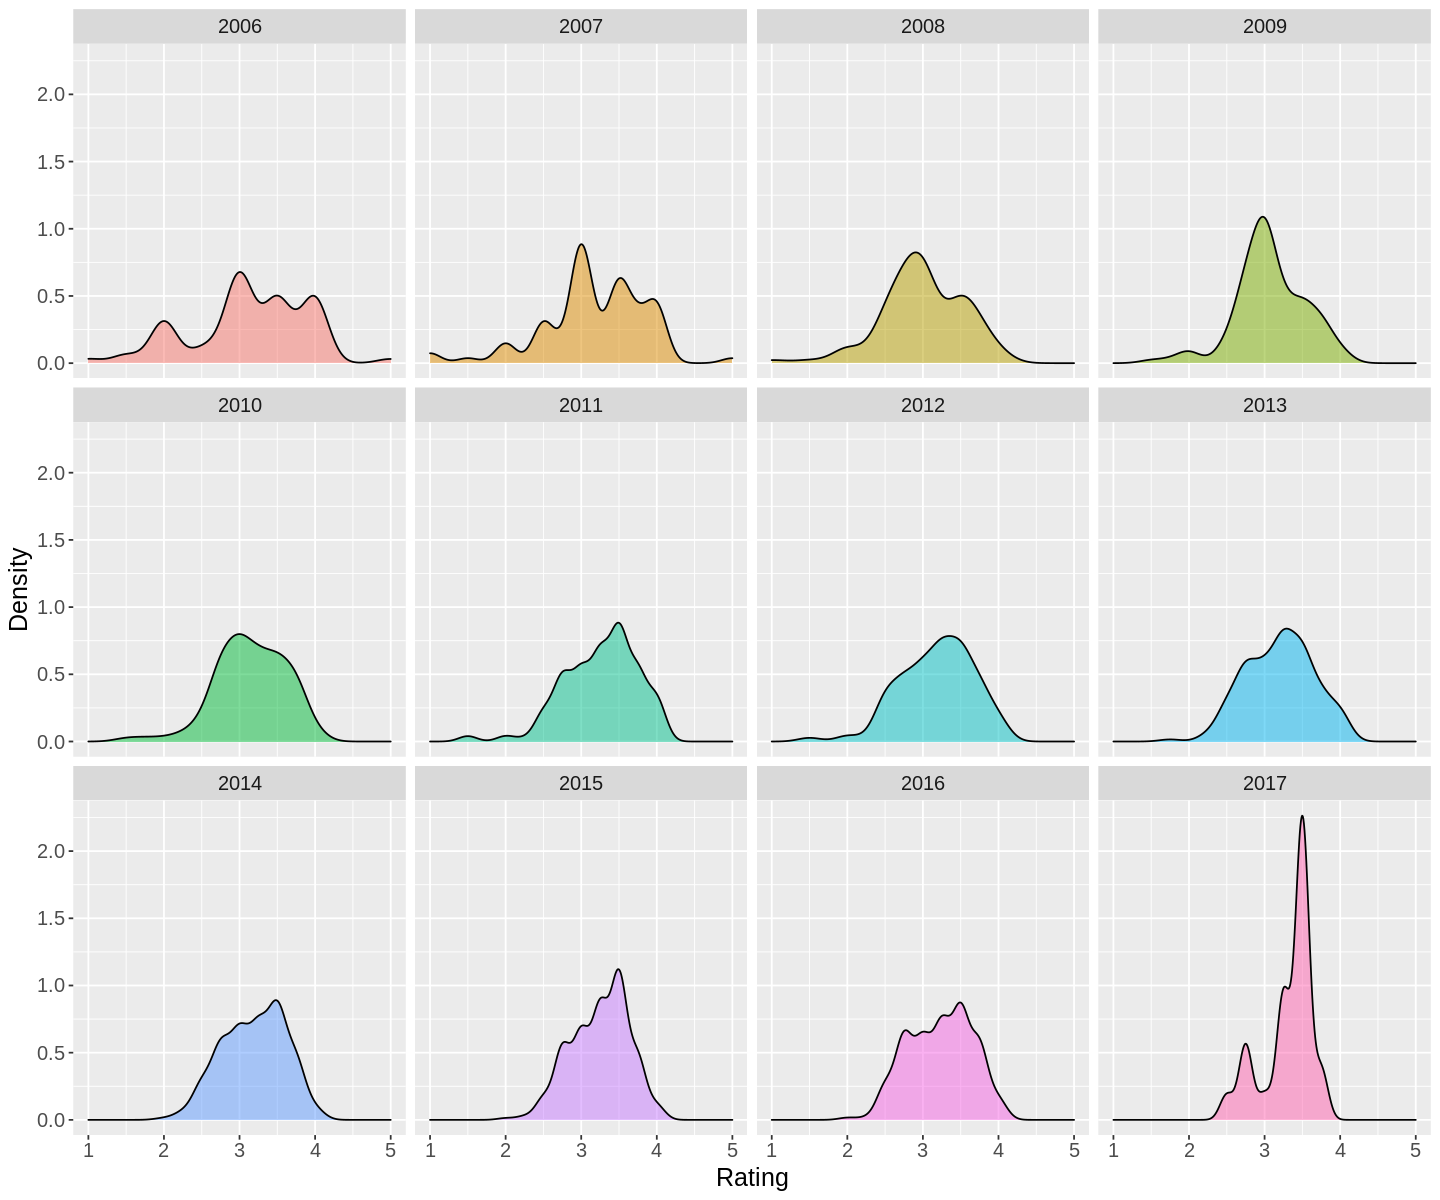

In [17]:
# codes and comments 

# have a markdown cell after every major step to explain what you did and what you learned. 

ggplot(data, aes(x = rating, fill = as.factor(date))) + 
  geom_density(alpha = .5) + 
  facet_wrap(~ as.factor(date)) + 
  guides(fill = FALSE) + labs(x = 'Rating', y = 'Density')+ theme( text = element_text(size = 15))

The above graph gives the density of the ratings given to chocolate with respect to the year.

where you can see that the old years the rating were spread out and in recent time the ratings are bit concentrated on specific interval.

In [18]:
standard_deviations <- 
  data %>% group_by(date) %>%
  summarise(count = n(), avg = mean(rating), sd = sd(rating)) 

standard_deviations

date,count,avg,sd
<int>,<int>,<dbl>,<dbl>
2006,72,3.125000,0.7691224
2007,77,3.162338,0.6998193
2008,93,2.994624,0.5442118
2009,123,3.073171,0.4591195
2010,111,3.148649,0.4663426
2011,165,3.256061,0.4899536
2012,195,3.178205,0.4835962
2013,184,3.197011,0.4461178
2014,247,3.189271,0.4148615


Even here you can see that the standard deviation is been reduced as the years go by

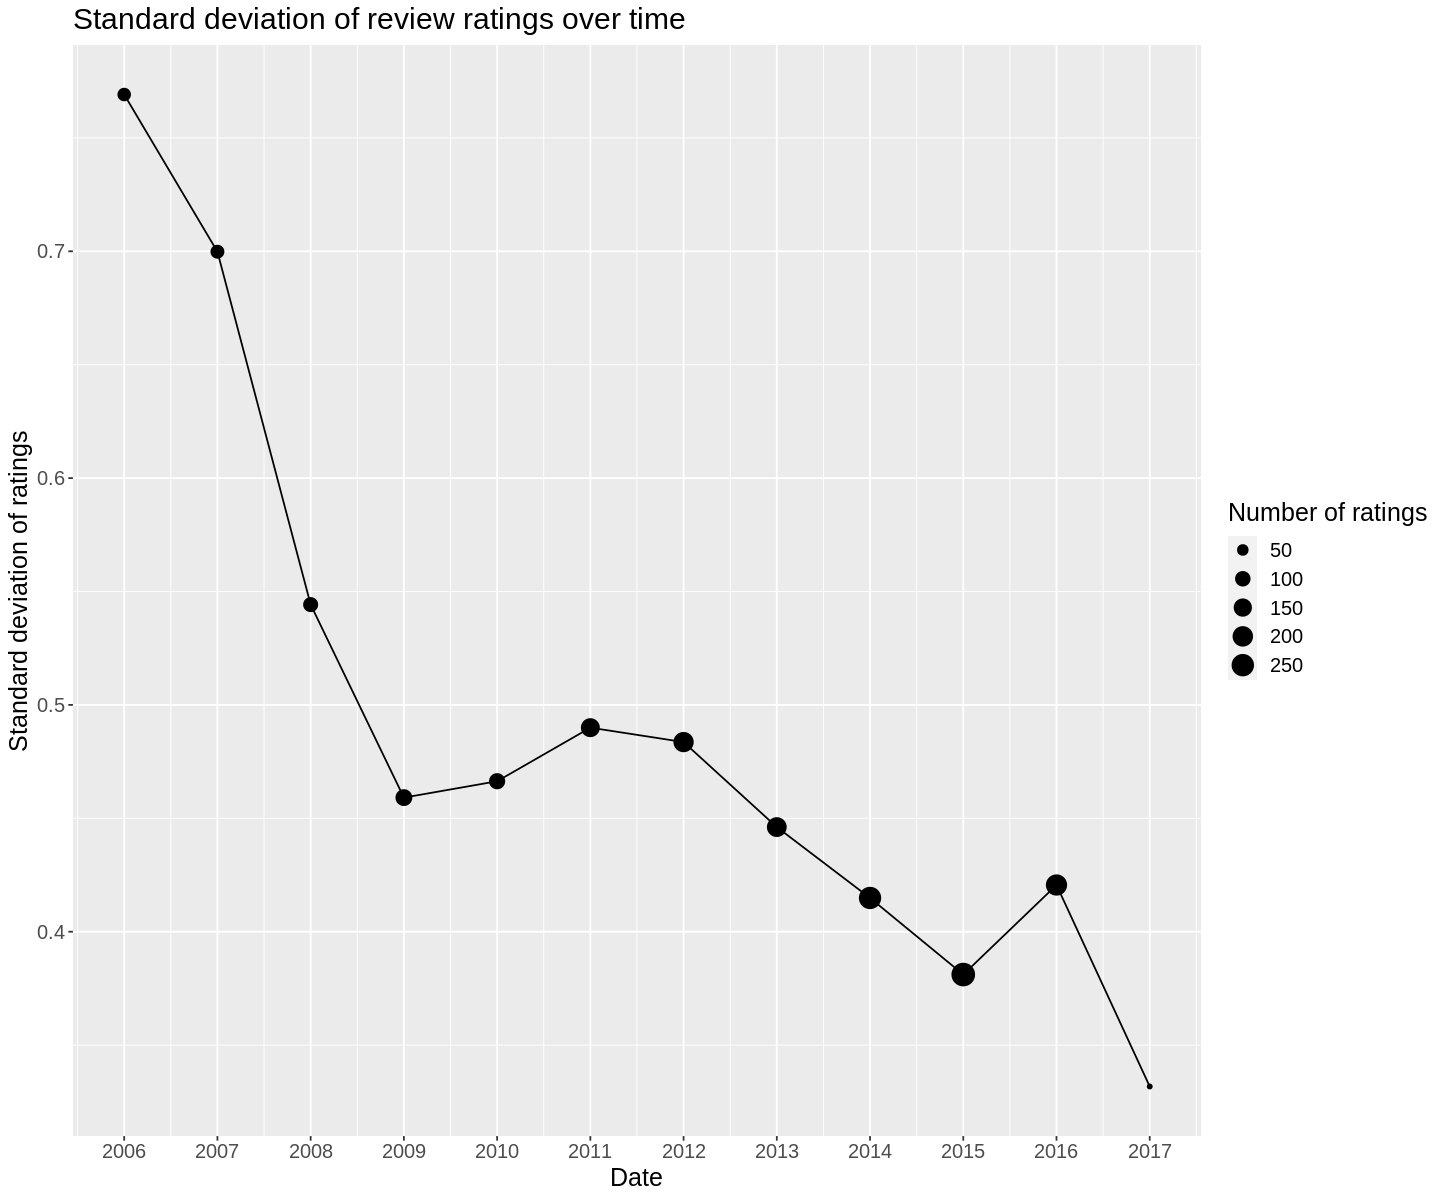

In [19]:
standard_deviations %>% # Use our previous summary table
  ggplot(aes(date, sd)) + 
  geom_point(aes(size = count)) + # Change point size depending on number of reviews
  geom_line(size = .5) + 
  scale_x_continuous(breaks = 2006:2017) +
  scale_size(breaks = seq(0,250,50), name = 'Number of ratings') + 
  labs(x = 'Date', 
       y = 'Standard deviation of ratings', 
       title = 'Standard deviation of review ratings over time')+ theme( text = element_text(size = 15))

you can also see that in 2017 the number of ratings taken are low which reduces the deviation range.

but this doesn't bother the trend which we found (as the years goes by the deviation of the ratings reduces).

In [20]:
low_scores <- data %>% 
  group_by(date) %>%
  summarise(less_than_2.5 = sum(rating < 2.5), count = n(), perc = round(less_than_2.5 / count, 2))

low_scores

date,less_than_2.5,count,perc
<int>,<int>,<int>,<dbl>
2006,13,72,0.18
2007,7,77,0.09
2008,7,93,0.08
2009,6,123,0.05
2010,5,111,0.05
2011,5,165,0.03
2012,6,195,0.03
2013,4,184,0.02
2014,5,247,0.02


If you examine the data more closely, year by year, at the reviews that received a rating of less than 2.5, you can see that, despite an increase in the number of reviews, less of those reviews are receiving such low ratings. Only 5 reviews have fallen below that mark since 2015, compared to 18% (13/72) of reviews in 2006!

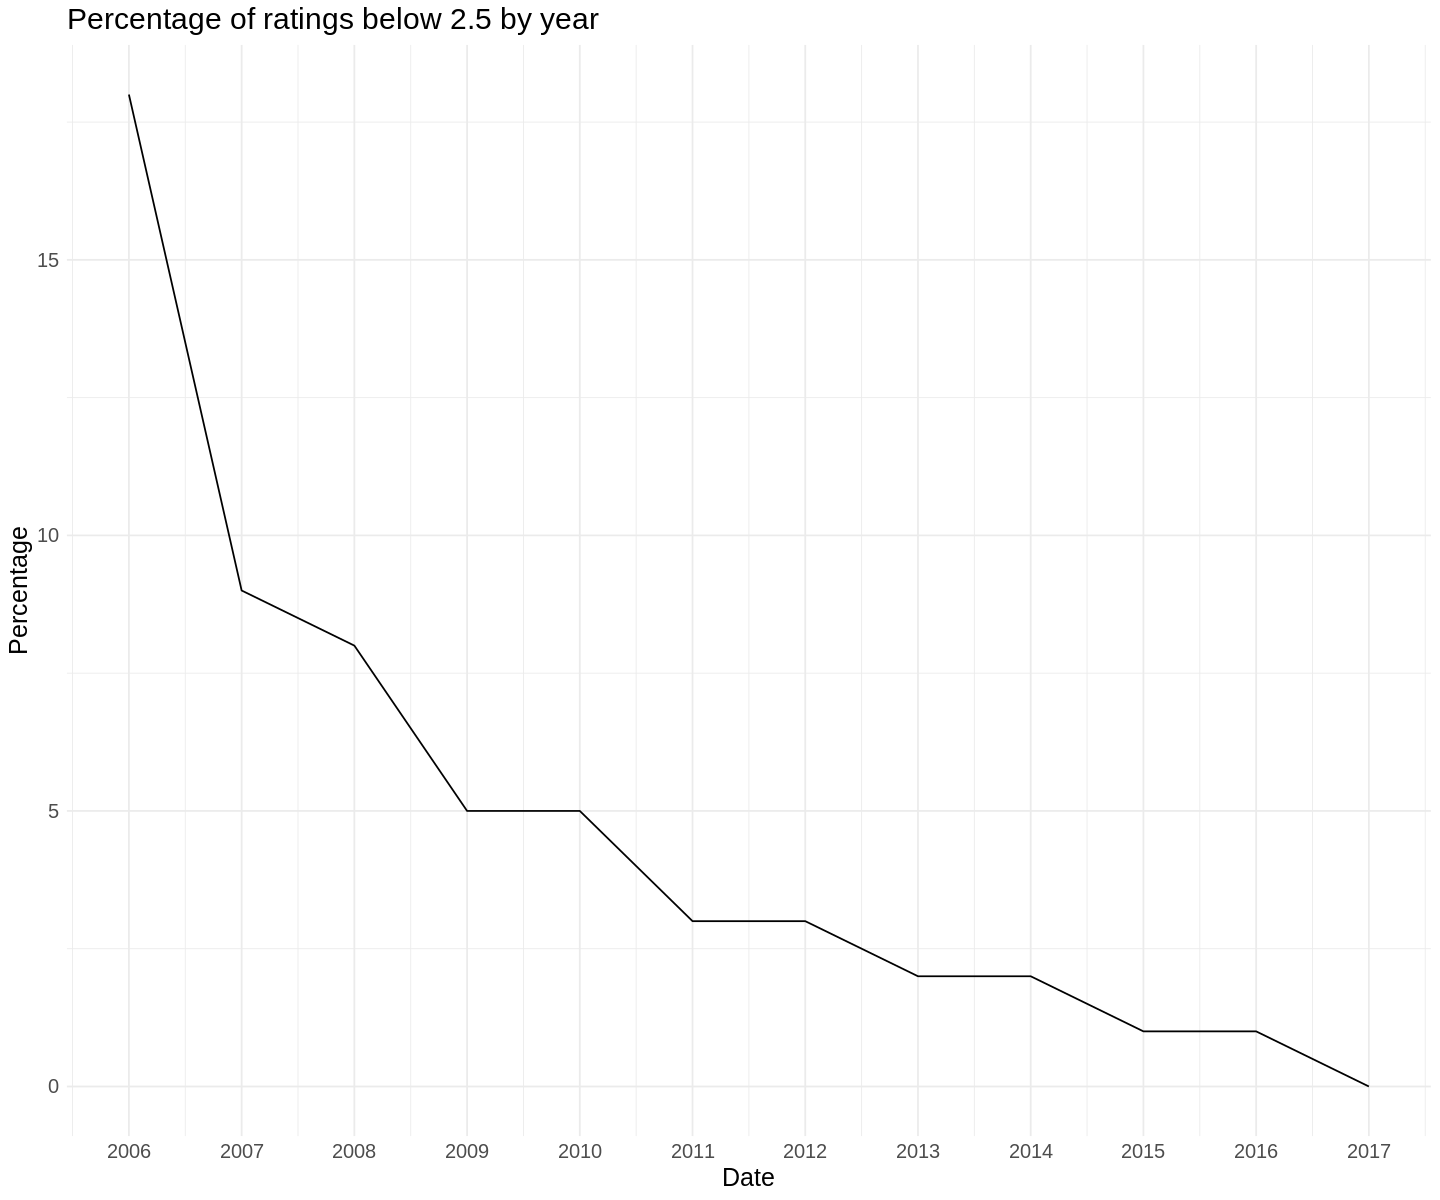

In [21]:
low_scores %>%
  ggplot() + geom_line(aes(date, perc * 100)) + 
  theme_minimal() + 
  scale_x_continuous(breaks = 2006:2017) +
  labs(x = 'Date', 
       y = 'Percentage',
       title = 'Percentage of ratings below 2.5 by year') + theme( text = element_text(size = 15))

Frequent ratings over time
So we have established that the spread of the ratings is getting smaller, and reviewers are giving less low scores below 2.5.


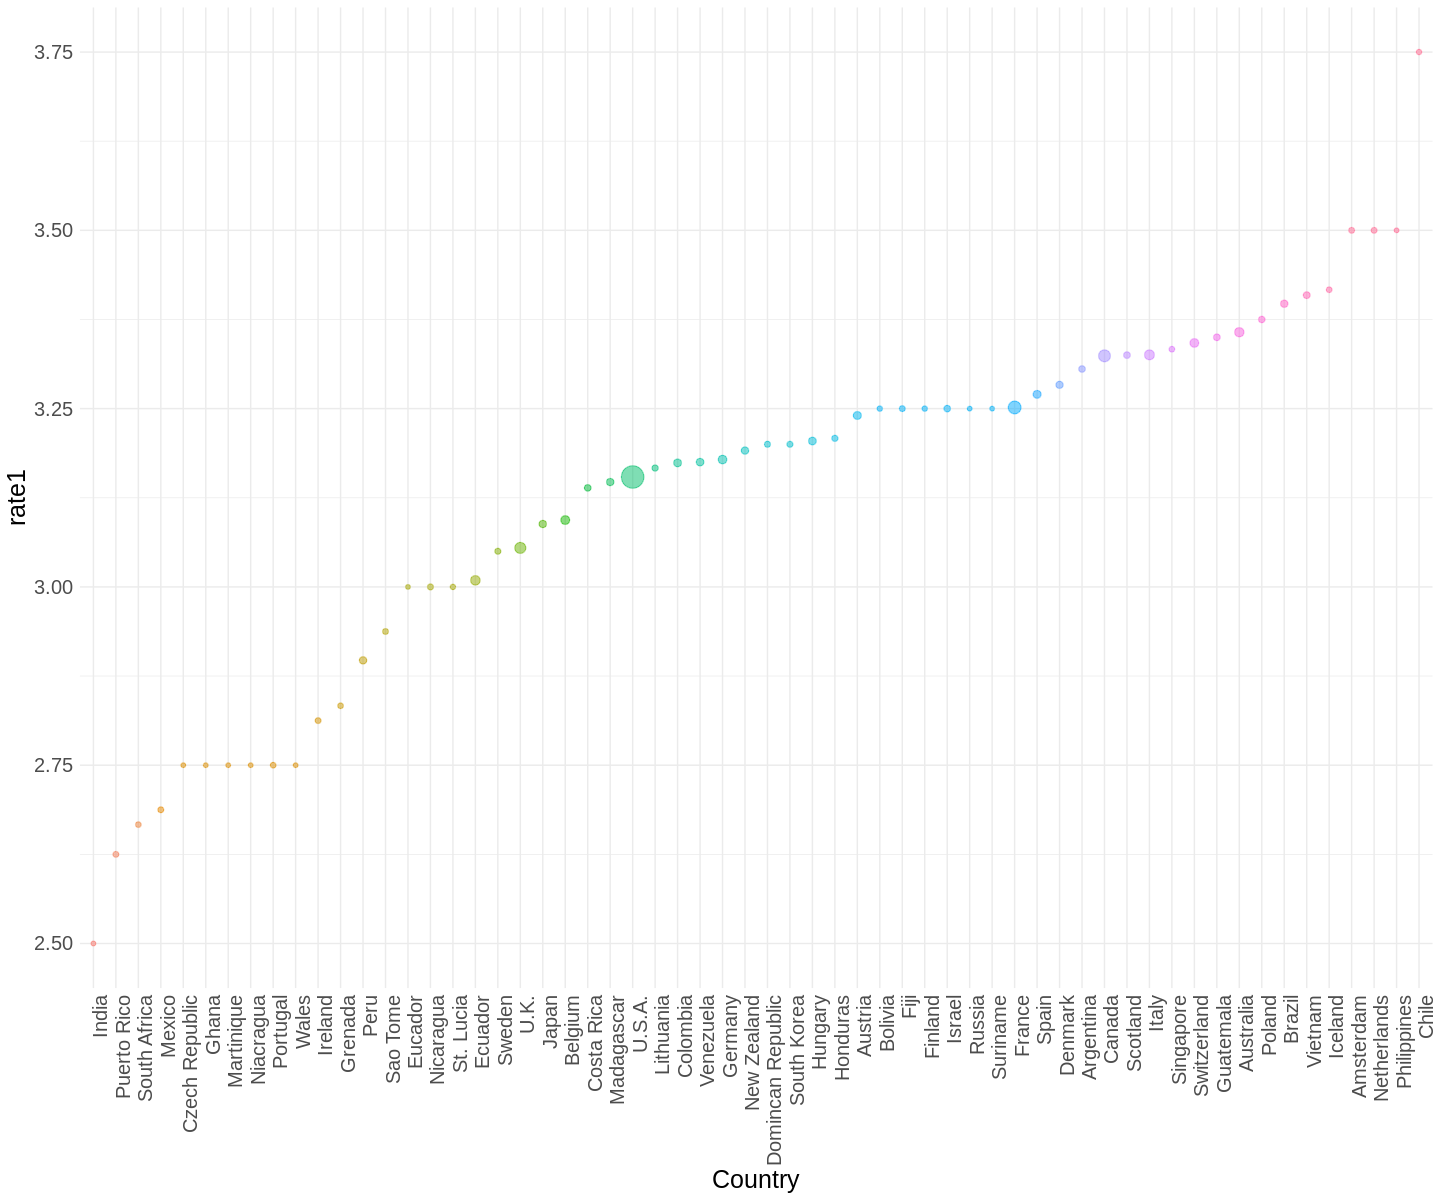

In [38]:
#average rating by location
loca <- group_by(data, location)
good <- summarise(loca,  count=n(),
                  rate1= mean(rating))
good1<- arrange(good, desc(rate1))

#scatter plot
ggplot(good1,aes(x=reorder(location,rate1), y=rate1)) +geom_point(aes(size=count, colour=factor(rate1)), alpha=1/2) + theme_minimal(base_size = 9)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1) , legend.position="none") +
  labs(x="Country", "Chocolate Rating", "Chocolate Rating vs Country") + theme( text = element_text(size = 15))

Here we have grouped the country together then we have taken the average value of the ratings and ploted on the graph.

The graph shows that Chile has an average score of 3.75, out ran all the other countries, produces the highest rating chocolate bars. 

IF we take the production volume into consideration, Canada and France produce fine quality chocolate with high volumes. 

Of course, U.S.A produces a large quantity of chocolate with decent favor.

In [23]:
companies <- data %>%
  rowwise() %>%
  mutate(company = str_trim(str_split(company, '\\(')[[1]][1])) %>%
  group_by(company) %>% 
  filter(n() > 10) %>% 
  mutate(avg = mean(rating))

spliting the company/maker column, selecting the company, and filter by those with at least 10 reviews.

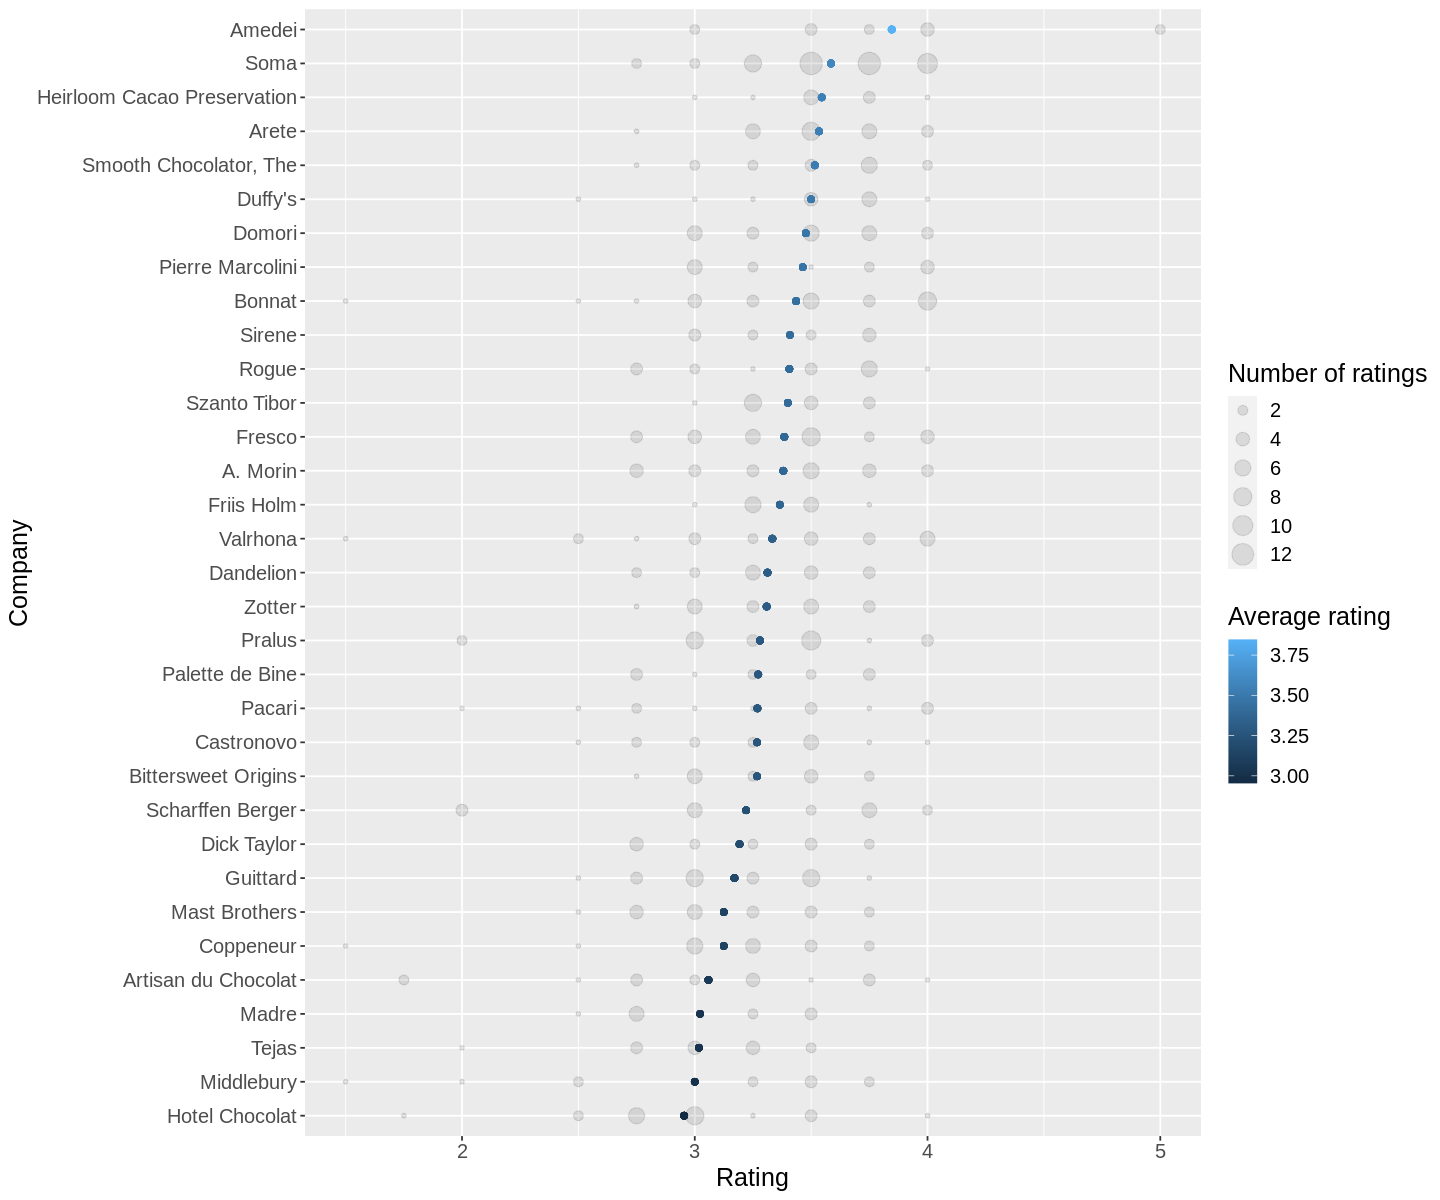

In [24]:
companies  %>%
  ggplot(aes(x = reorder(as.factor(company), rating, FUN = mean), y = rating)) + 
  geom_count(alpha = .1) + 
  geom_point(aes(x = as.factor(company), y = avg, colour = avg)) + 
  coord_flip() + 
  labs(x = 'Company', y = 'Rating') + 
  scale_color_continuous(name = 'Average rating', breaks = seq(3,4,.25)) + 
  scale_size_continuous(name = 'Number of ratings', breaks = seq(0,14,2)) + theme( text = element_text(size = 15))

By plotting the count of reviews for ratings using the size aesthetic again, we are also able to see the distribution of scores for the companies.

`geom_smooth()` using formula 'y ~ x'



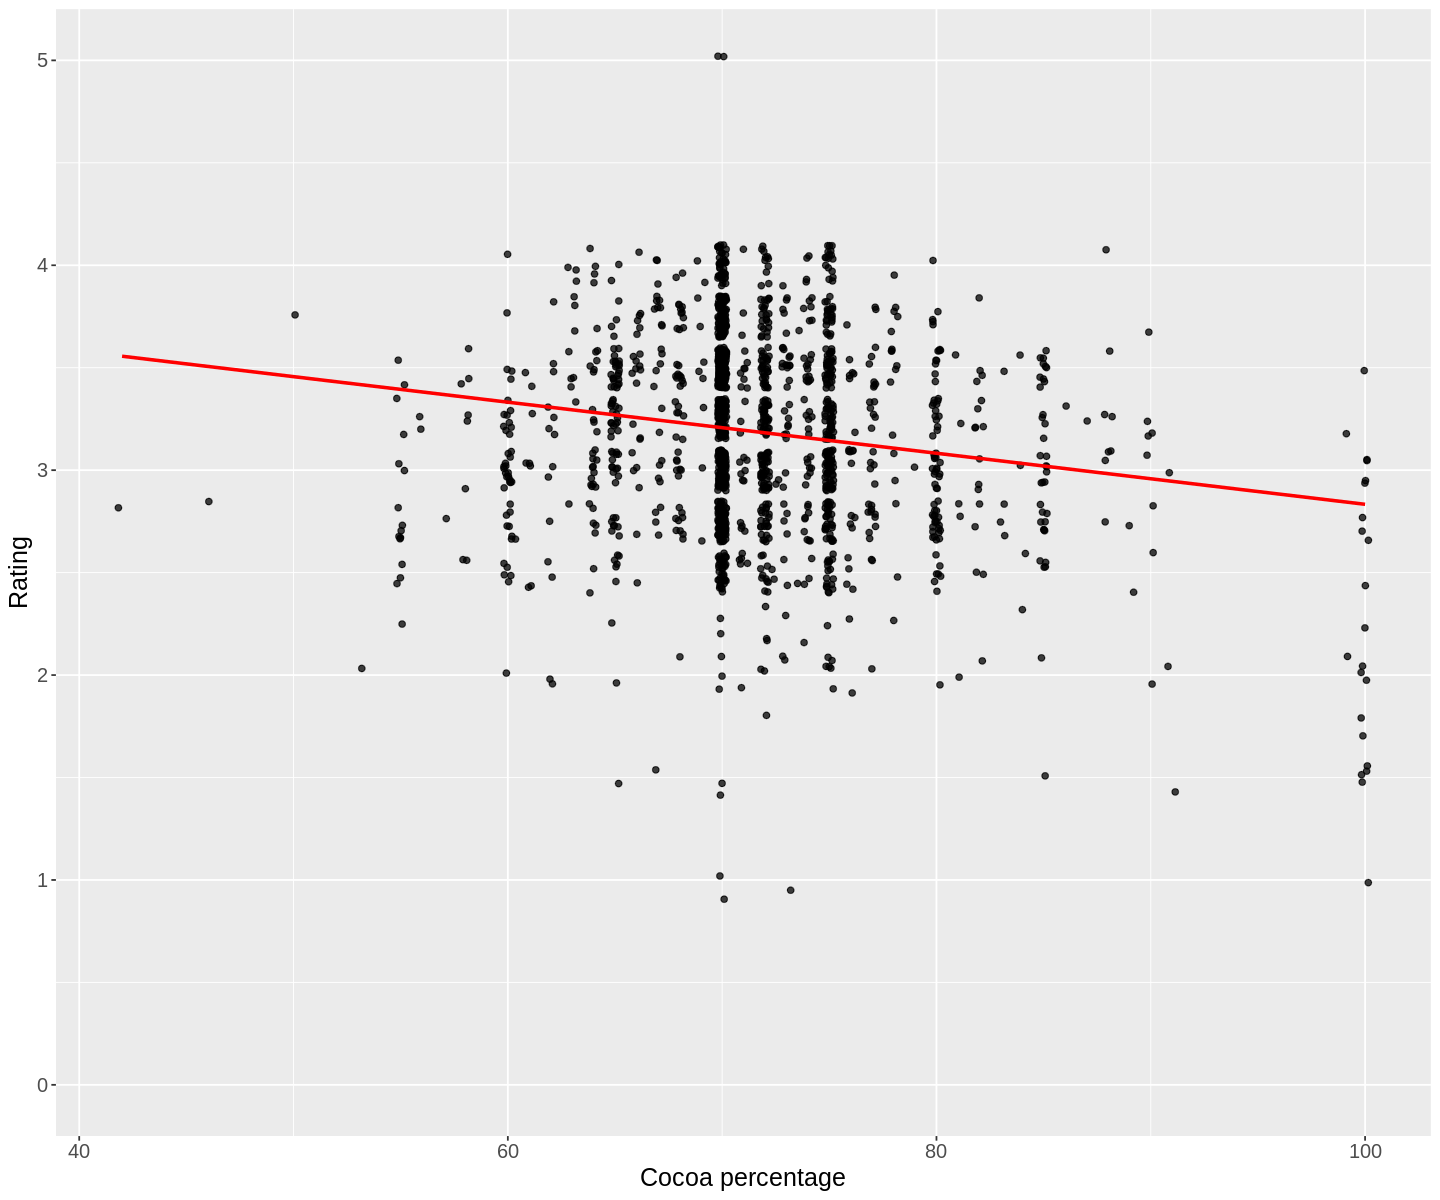

In [26]:
data %>%
  ggplot(aes(x = percent, y = rating)) +
  geom_jitter(alpha = .75) + 
  coord_cartesian(ylim = c(0,5)) +
  labs(x = 'Cocoa percentage', y = 'Rating') + 
  geom_smooth(method = 'lm', se = FALSE, col = 'red')+ theme( text = element_text(size = 15))

There doesn’t appear to be a strong relationship between cocoa percent and rating here. Let’s have a look at the model separately.

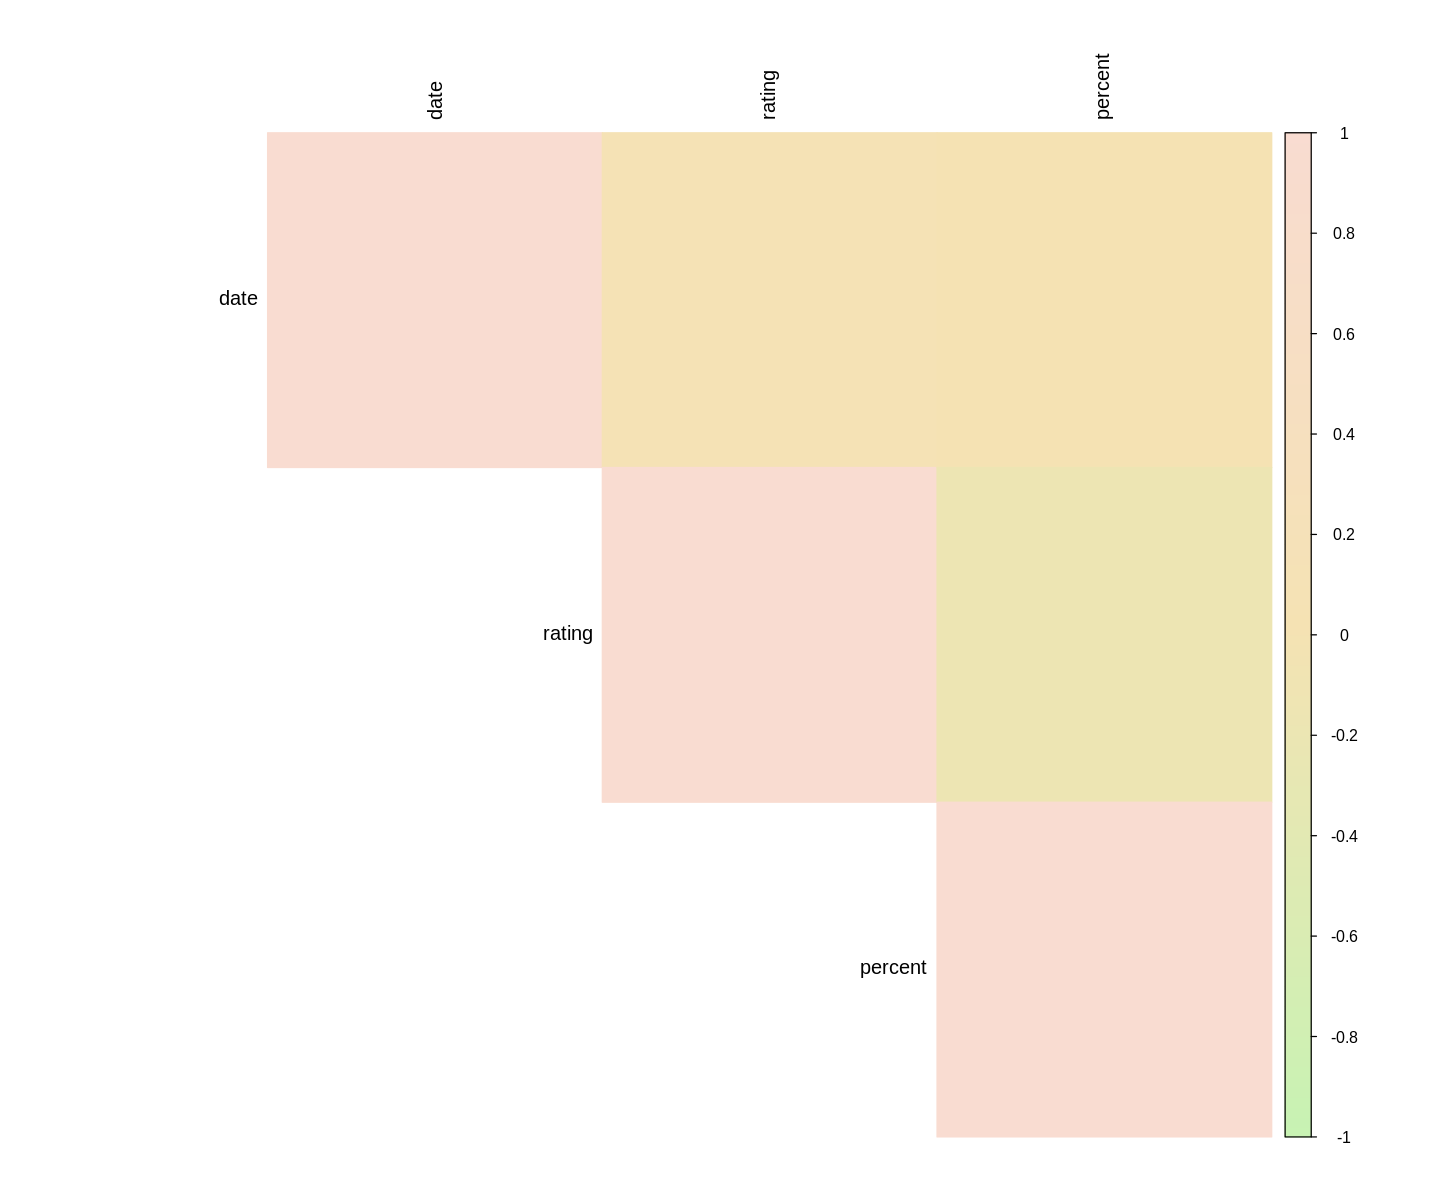

In [40]:
corrplot(cor(data[c("date","rating","percent")]), 
         method="color",col=colorRampPalette(c("#C8F3B3","#F5E3B3","#F9DCD1"))(100),type="upper",tl.srt=90,tl.col="black")


the above is the correlation plot

In [27]:
beans <- data %>% 
    filter(!is.na(origin),     # Remove those with NA values
           !nchar(origin) < 2) # Remove those where the origin is too short to be a realistic palce

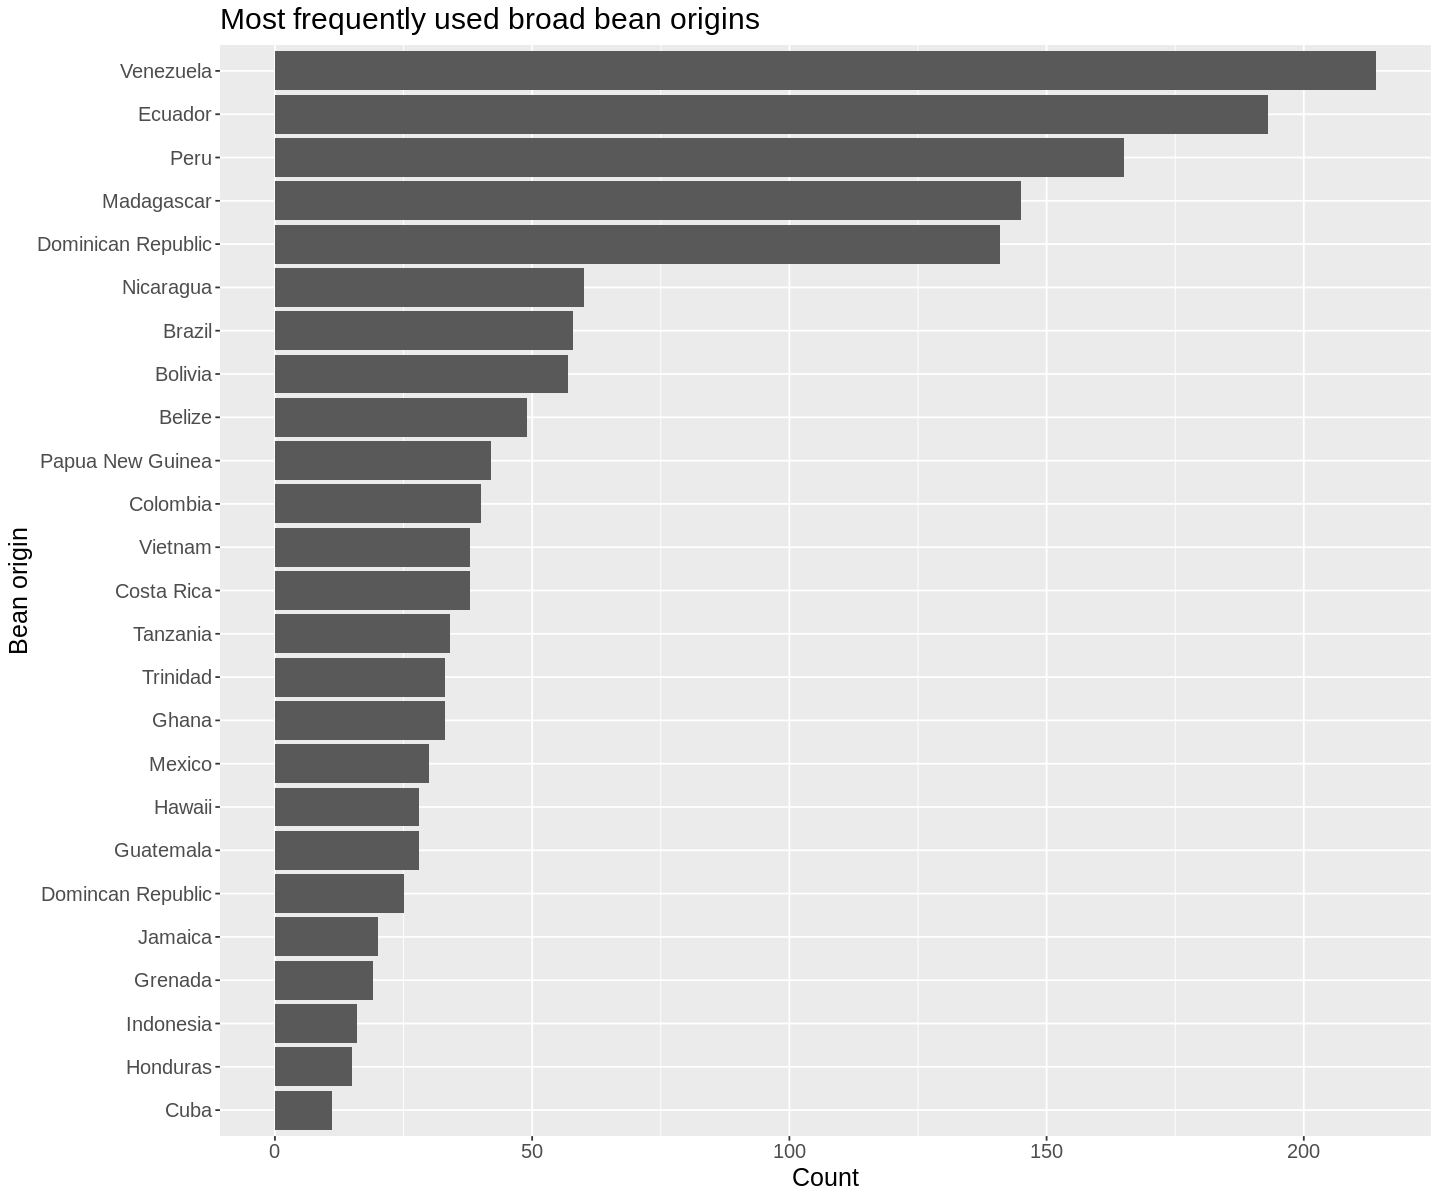

In [29]:
beans %>% 
  group_by(origin) %>% # Group by origin
  filter(n() > 10) %>% # Limit to those with at least 10 observations
  mutate(count = n()) %>% # Add the count column
  ggplot(aes(x = reorder(origin, count))) + 
  geom_bar() + 
  coord_flip() + 
  labs(x = 'Bean origin', y = 'Count', title = 'Most frequently used broad bean origins') + theme( text = element_text(size = 15))

Looking at this simple graph we are able to see that the most popular broad bean origins are Venezuela, Ecuador and Peru. Madagascar, probably more famous for its vanilla, is in fourth place.


## 3. 4. 5. ... The Rest..

Similar to above, have **sections** for every major step in your analysis.  PCA, FA, Clustering, etc. running your models, hypotheses, explaining what you have learned, presenting results with visualizations, and the conclusion should have their own sections. 



Call:
lm(formula = rating ~ percent, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2071 -0.3196  0.0429  0.3178  1.7929 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.079388   0.126757  32.183  < 2e-16 ***
percent     -0.012461   0.001761  -7.076 2.12e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4717 on 1793 degrees of freedom
Multiple R-squared:  0.02717,	Adjusted R-squared:  0.02662 
F-statistic: 50.07 on 1 and 1793 DF,  p-value: 2.122e-12


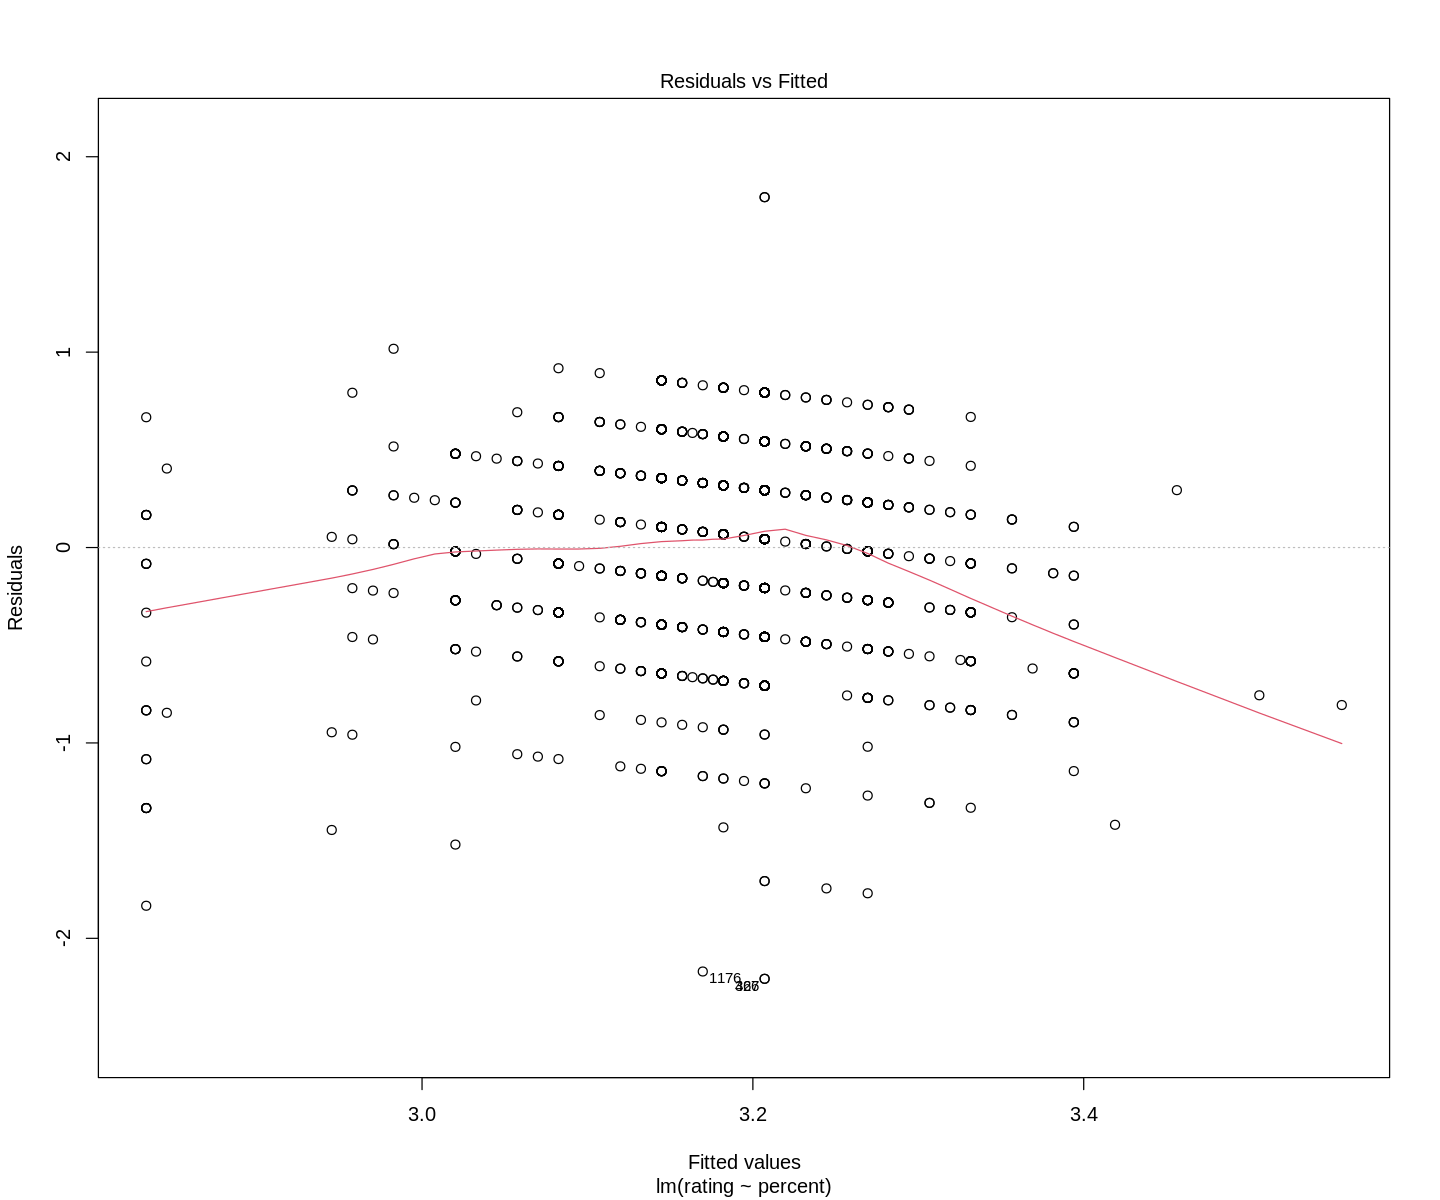

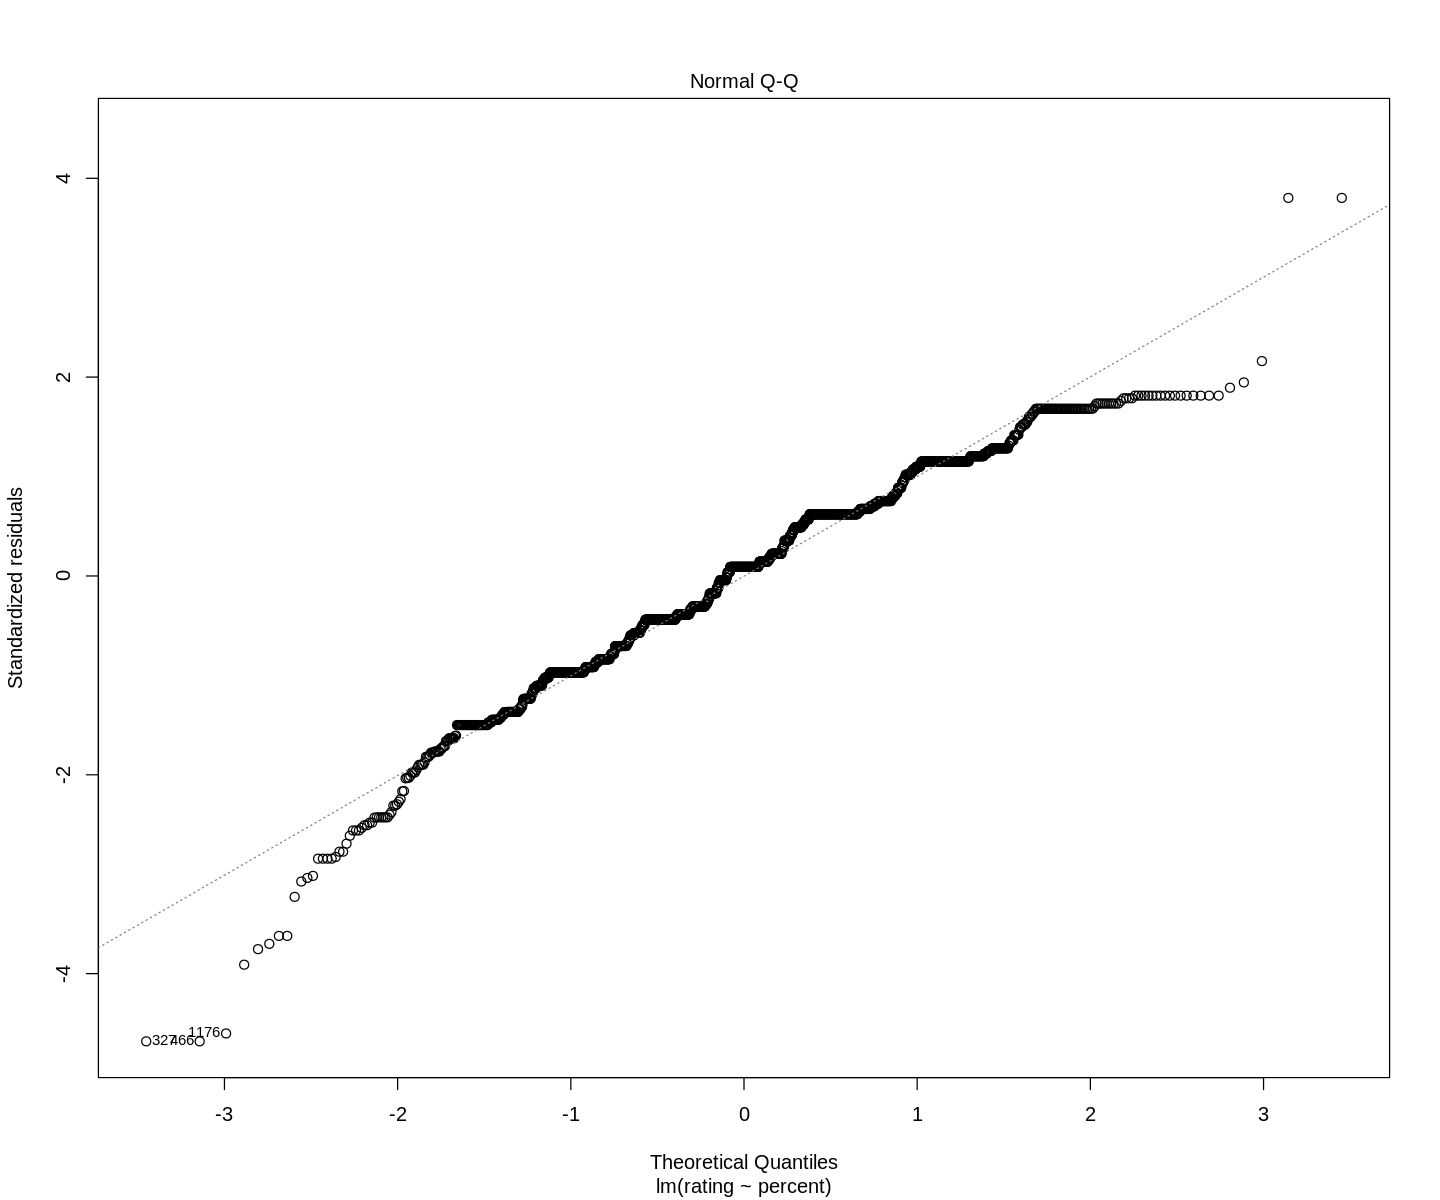

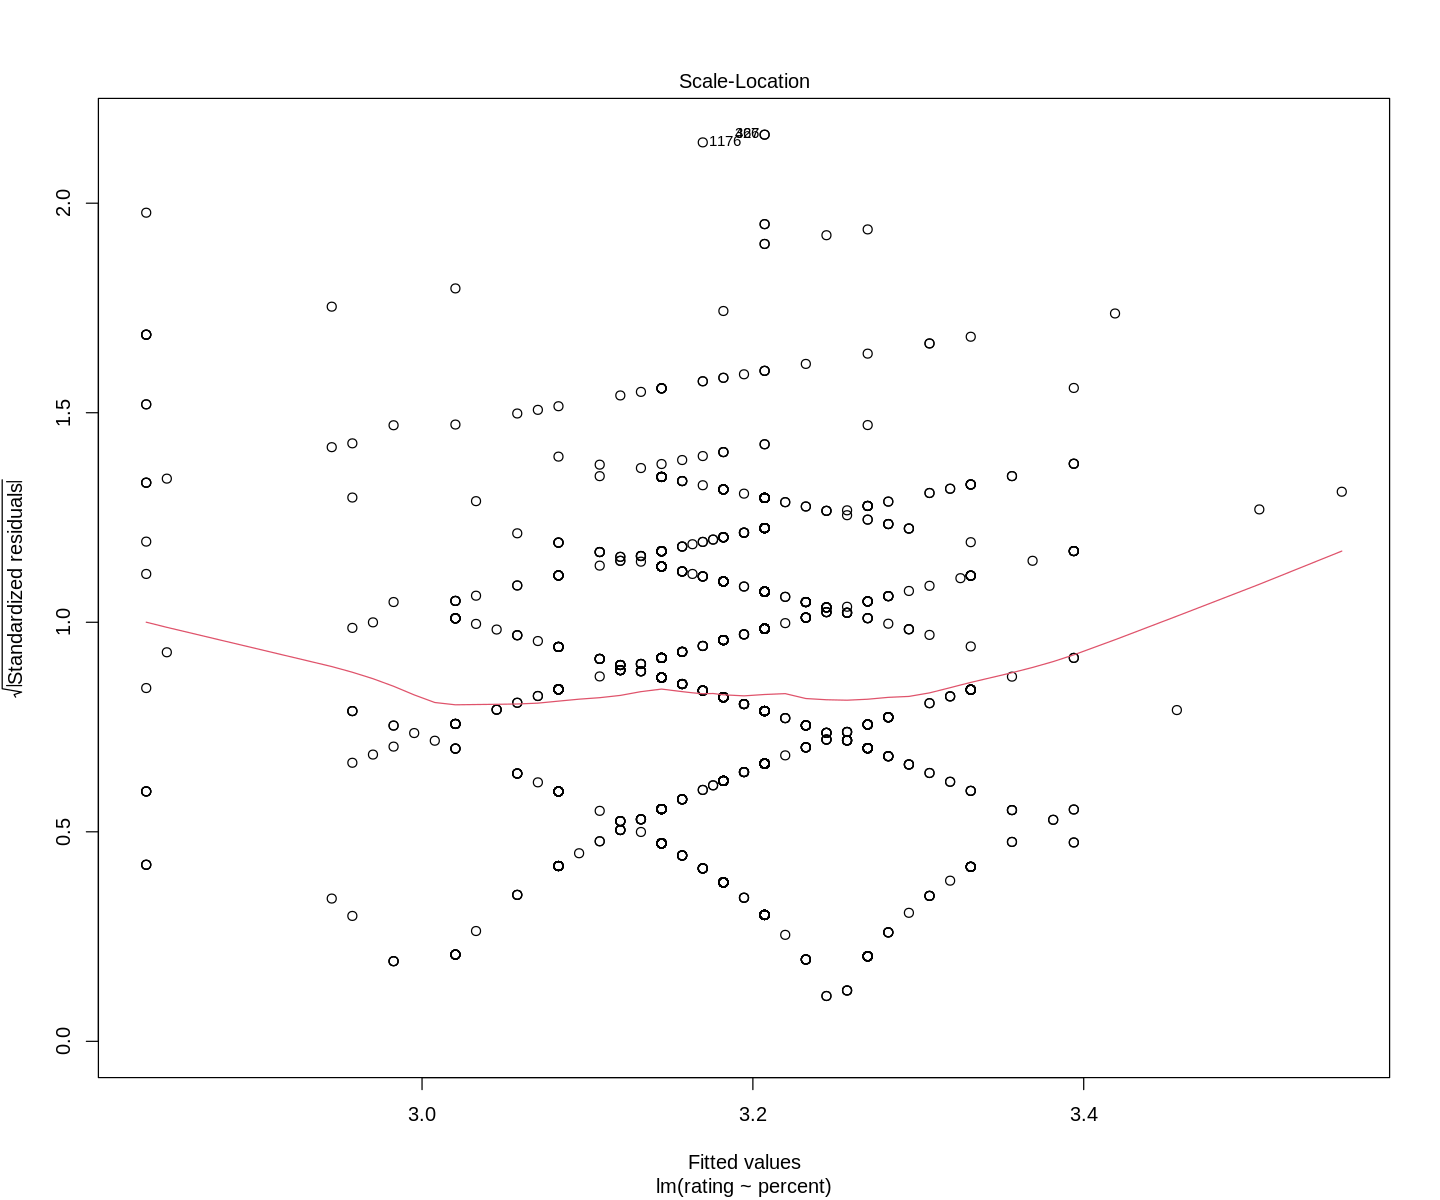

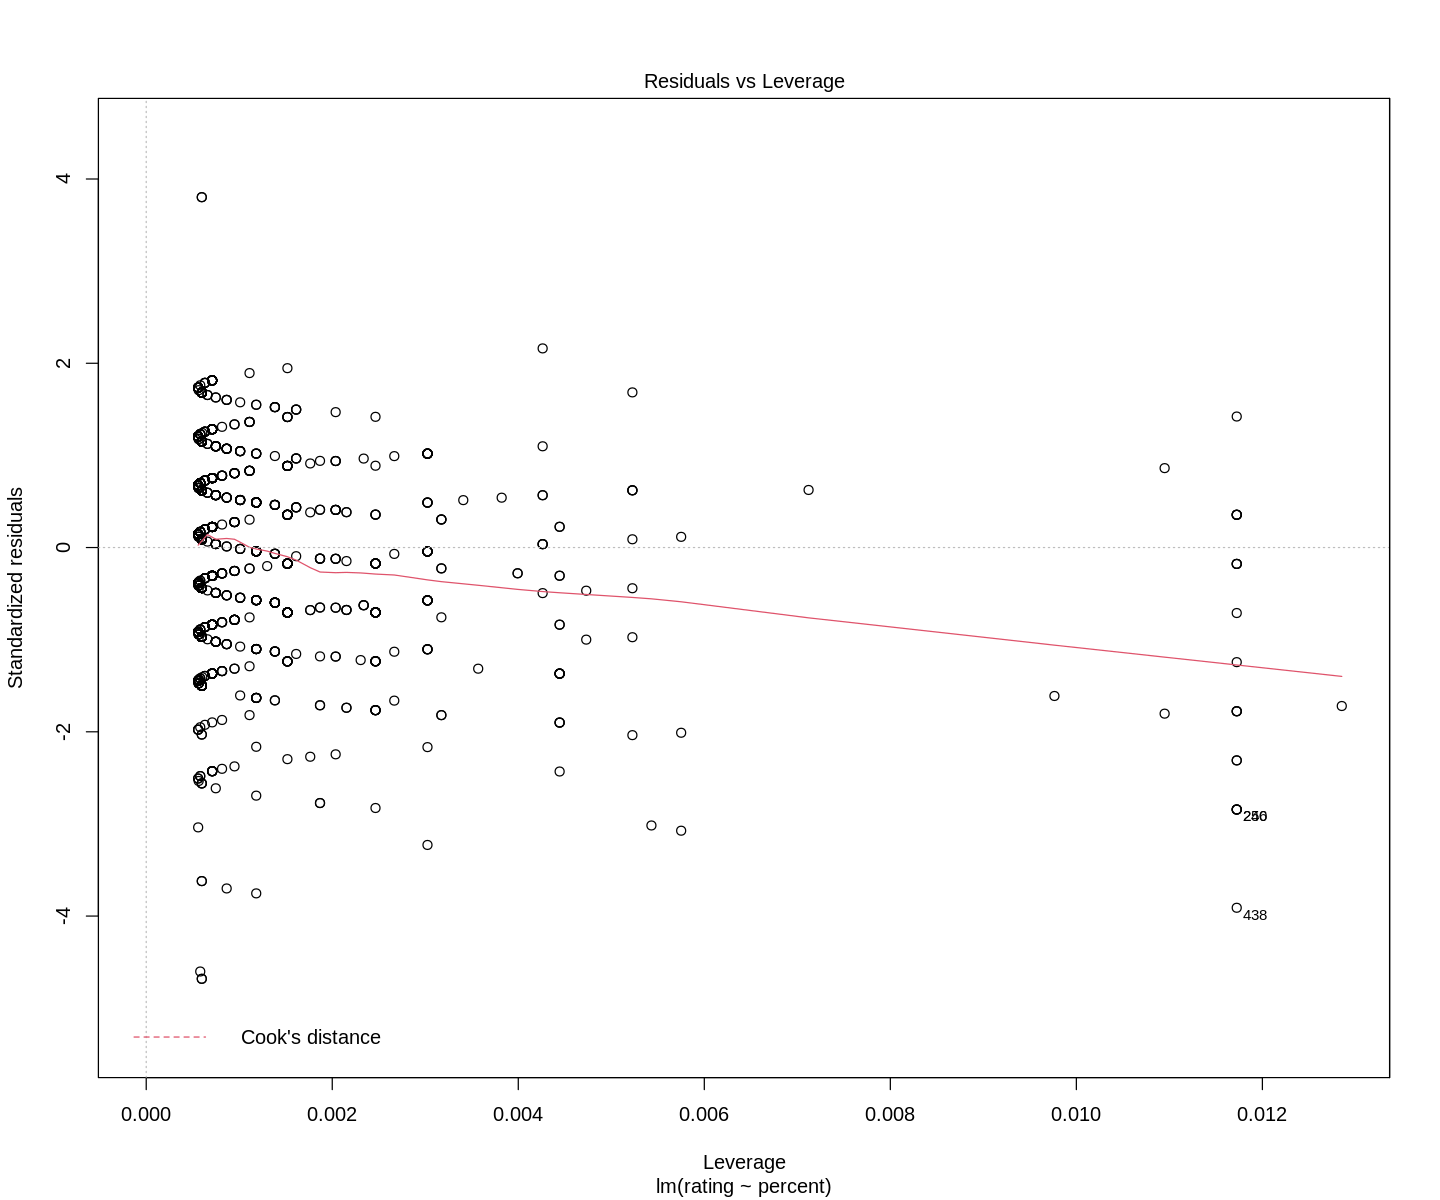

In [59]:
#linear regression

reg_model = lm(rating~percent, data = data)
summary(reg_model)
plot(reg_model)

In [42]:
a<- data[data$location %in% c("U.S.A.","France","Canada"),]
a1<- group_by(a, location) %>%
     summarise(count=n(), mean=mean(rating, na.rm=TRUE),
               sd=sd(rating,na.rm=TRUE))

a1

location,count,mean,sd
<chr>,<int>,<dbl>,<dbl>
Canada,125,3.324000,0.4236268
France,156,3.251603,0.5466148
U.S.A.,764,3.154123,0.4419656


In [49]:
a2<- a %>% rowwise %>%
  filter(!is.na(location))%>%
  group_by(location)%>%
  filter(n()>=10)%>%
  mutate(mean=mean(rating))
head(a2)

company,bean.bar.orgin,ref,date,percent,location,rating,beantype,origin,mean
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome,3.251603
A. Morin,Kpime,1676,2015,70,France,2.75,,Togo,3.251603
A. Morin,Atsane,1676,2015,70,France,3.00,,Togo,3.251603
A. Morin,Akata,1680,2015,70,France,3.50,,Togo,3.251603
A. Morin,Quilla,1704,2015,70,France,3.50,,Peru,3.251603
A. Morin,Carenero,1315,2014,70,France,2.75,Criollo,Venezuela,3.251603


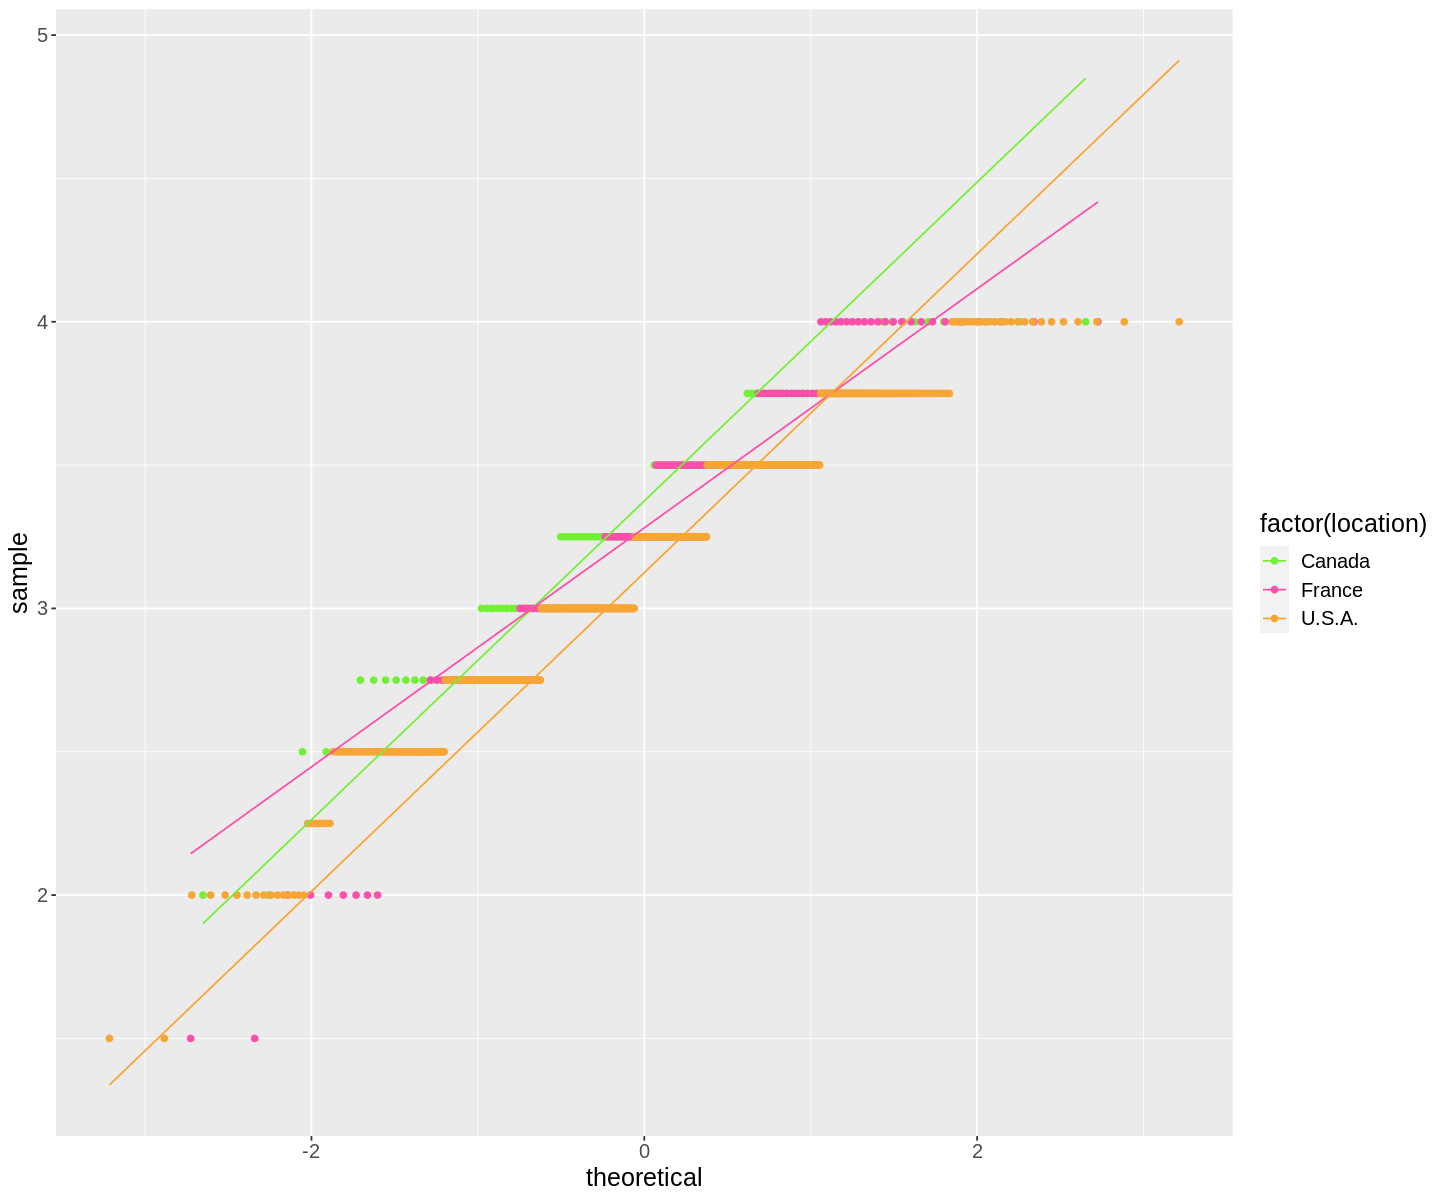

In [51]:
ggplot(a, aes(sample = rating, colour = factor(location))) +
  scale_color_manual(values=c("#72f035", "#fc4eaa", "#f7a534"))+
  stat_qq() +
  stat_qq_line() + theme( text = element_text(size = 15))

We can see it actually failed the Normal Distribution test.

In [45]:
var<- bartlett.test(rating ~ location, data= a) 
var


	Bartlett test of homogeneity of variances

data:  rating by location
Bartlett's K-squared = 14.232, df = 2, p-value = 0.0008121


From the Bartlett homogeneity test we can see p<0.05, which means the variance level of the three groups are significantly different from each other, therefore we conclude, we can’t use ANOVA.

In [46]:
res.aov <-aov(rating ~ location, data=a)
summary(res.aov)

              Df Sum Sq Mean Sq F value   Pr(>F)    
location       2   3.82  1.9094   9.143 0.000116 ***
Residuals   1042 217.60  0.2088                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Null Hypothesis: There is No Difference of chocolate bar rating between U.S.A and France.

since p value is less than 0.05 we reject null hypothesis

which shows hat there is an significant difference between the mean rating of USA, France and Canada

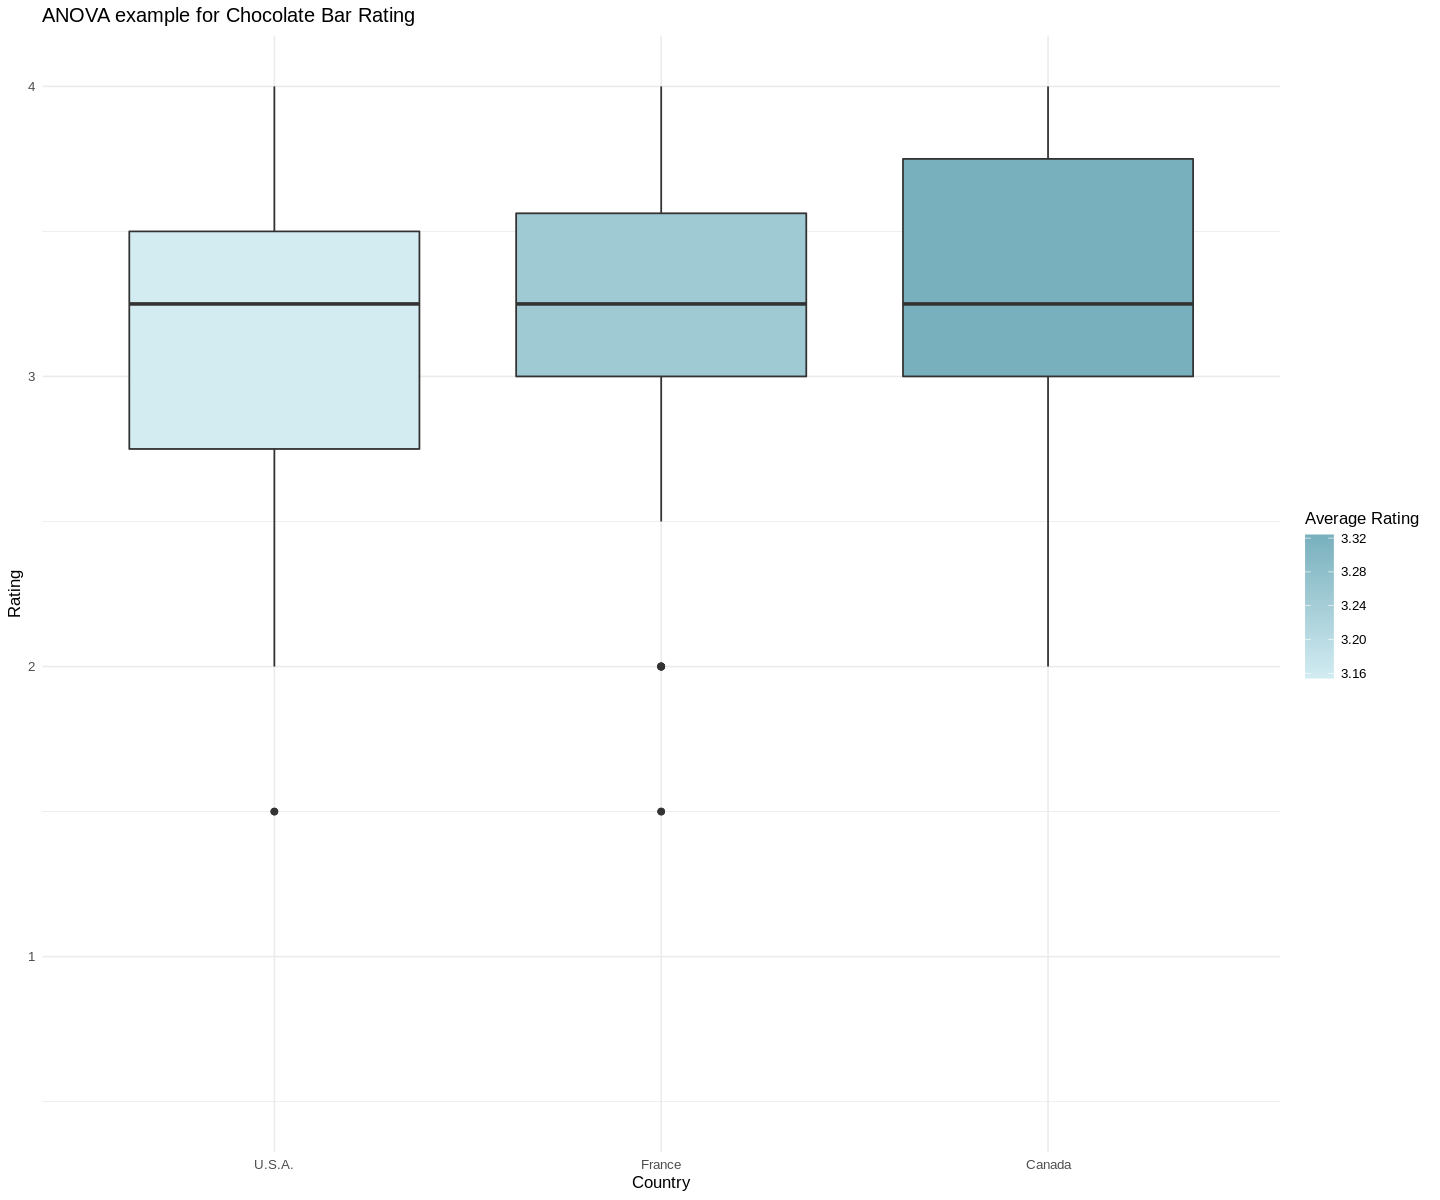

In [47]:
bc <- ggplot(a2,aes(x=reorder(location,rating), y=rating, fill=mean))+geom_boxplot()+
      theme_minimal(base_size=10) +
      scale_fill_continuous(name="Average Rating",low="#D2ECF2",high="#78B0BD") +
      expand_limits(y=c(0.5))+
      labs(x="Country", y="Rating")+ ggtitle("ANOVA example for Chocolate Bar Rating")
bc

ANOVA doesn’t fit the data, so the result is NOT correct, we can see from the box plot